# Plot Multiple Regions

This file shows how to create visualizations of the covid219 data comparing different states or regions.
See plotOneRegion.py for an introduction to using the covid19 package.

First we import the module and matplotlib

In [14]:
from covid19 import *
import matplotlib.pyplot as plt

Here is 

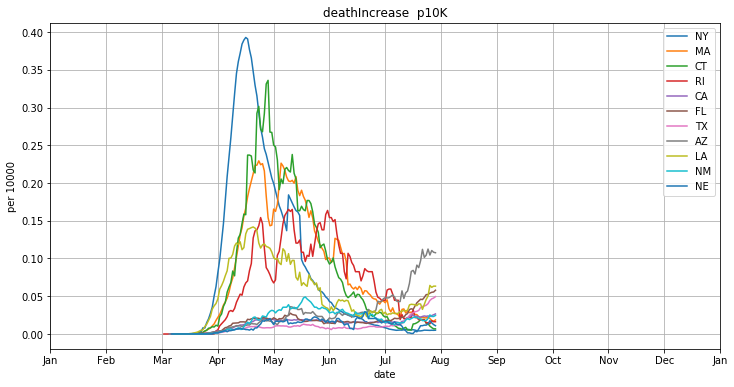

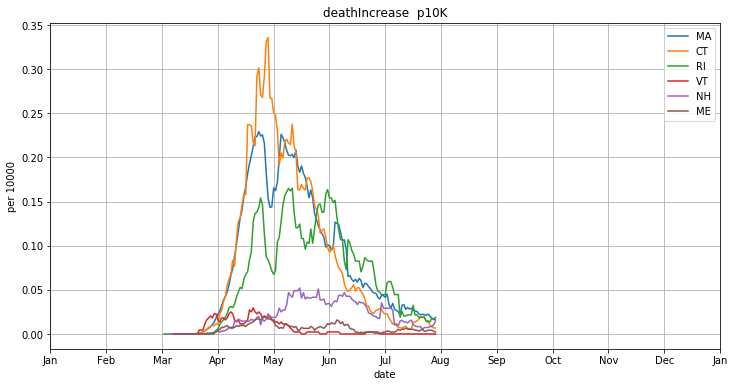

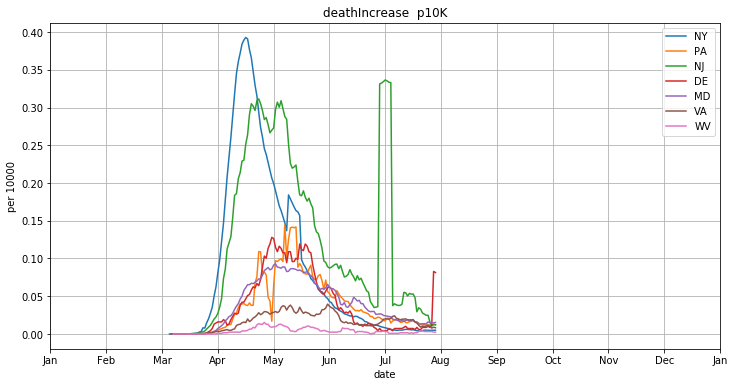

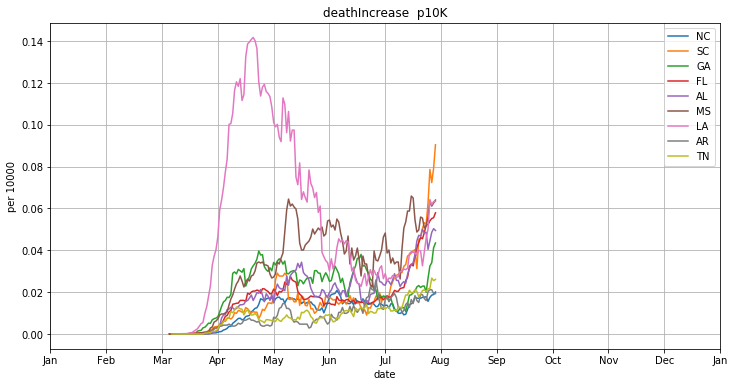

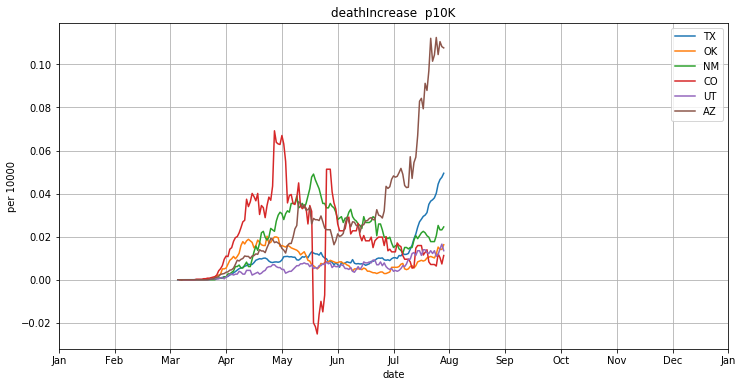

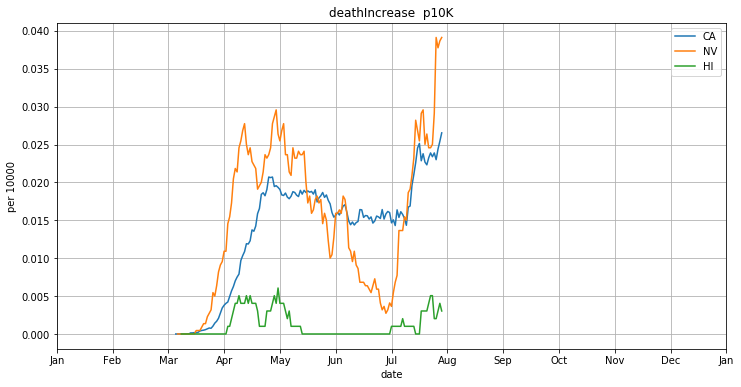

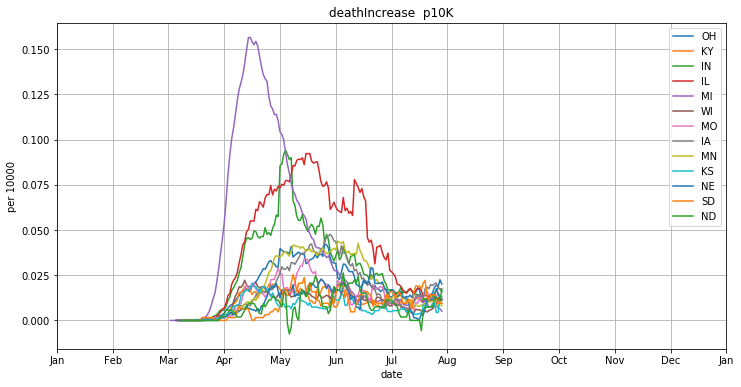

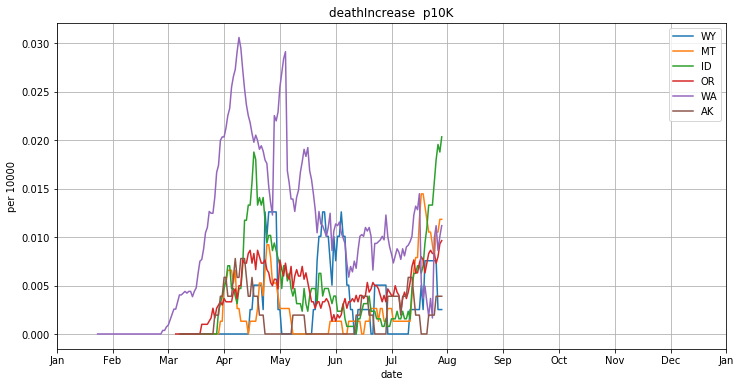

In [24]:

perCapita=True
averageByWeek=True
options = {'perCapita':perCapita,'averageByWeek':averageByWeek}

plt.rcParams['figure.figsize'] = [12, 6]
#fig, ax = plt.subplots()
#field = 'positive'
#field = 'recovered'
#field = 'positiveIncrease'
field = 'deathIncrease'
#field = "hospitalizedCurrently"
#field = "hospitalizedCumulative"
#field = "death"
#field = "positive"
#field = "hospitalized"
#field = "inIcuCurrently"
#field = "onVentilatorCurrently"
#field = "totalTestResultsIncrease"
## here we can plot all of the states!!
#for state in deepSouth:
#    plotItems(collectData([state],field,{'perCapita':perCapita,'averageByWeek':averageByWeek}),state)


i=0

for region in [
    ['NY','MA','CT','RI','CA','FL','TX','AZ','LA','NM','NE']
    ,northEast
    ,midAtlantic
    ,southEast
    ,southWest
    ,west
    ,midWest
    ,northWest
    #,states
    ]:
  fig, ax = plt.subplots()
  for x in region:
    plotItems(collectData([x],field,options),x)
  ax.set(xlabel='day of year',
       ylabel='per 10000' if perCapita else "raw numbers",
       title=field+" "+(" p10K" if perCapita else " raw"))
  plt.legend()
  plt.xlabel('date')
  #plt.yticks(np.arange(0,0.4,step=0.025))
  ax.grid()
  
  #legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
  fig.savefig("plots/plotz_"+str(i)+" "+field+("_p10k" if perCapita else "_raw")+".png")
  i = i+1